In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('clustering.csv', names=['x', 'y'])
data.head()

,x,y
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186


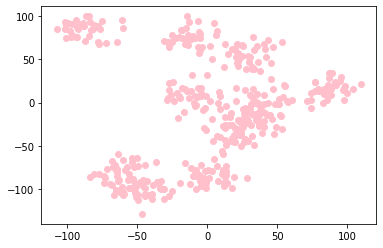

In [3]:
plt.scatter(data['x'], data['y'], color="pink")

## Metoda K-Średnich

Sprawdzimy optymalną ilość klastrów za pomocą silhouette score.

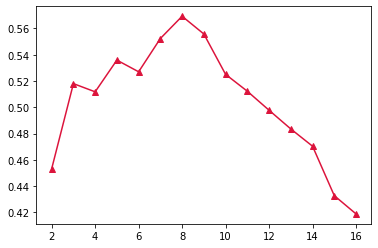

In [4]:
from sklearn.metrics import silhouette_score
n = []
score = []

for n_clusters in range(2,17):
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(data)
    n.append(n_clusters)
    score.append(silhouette_score(data, preds))
    
plt.plot(n,score,'^-', color="crimson")

Silhouette score sugeruje optymalną ilość klastrów jako 8. Sprawdzimy jak to wygląda w praktyce.

In [5]:
def kmeans_plot(data, cluster_number):
    kmeans = KMeans(cluster_number, random_state=0)
    kmeans.fit(data)
    kmeans_y = kmeans.predict(data)
    plt.scatter(data['x'], data['y'], c=kmeans_y, cmap="copper")
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], color='crimson', s=120, marker='X')
    plt.title('Metoda K-Średnich dla ' + str(cluster_number) + ' klastrów')

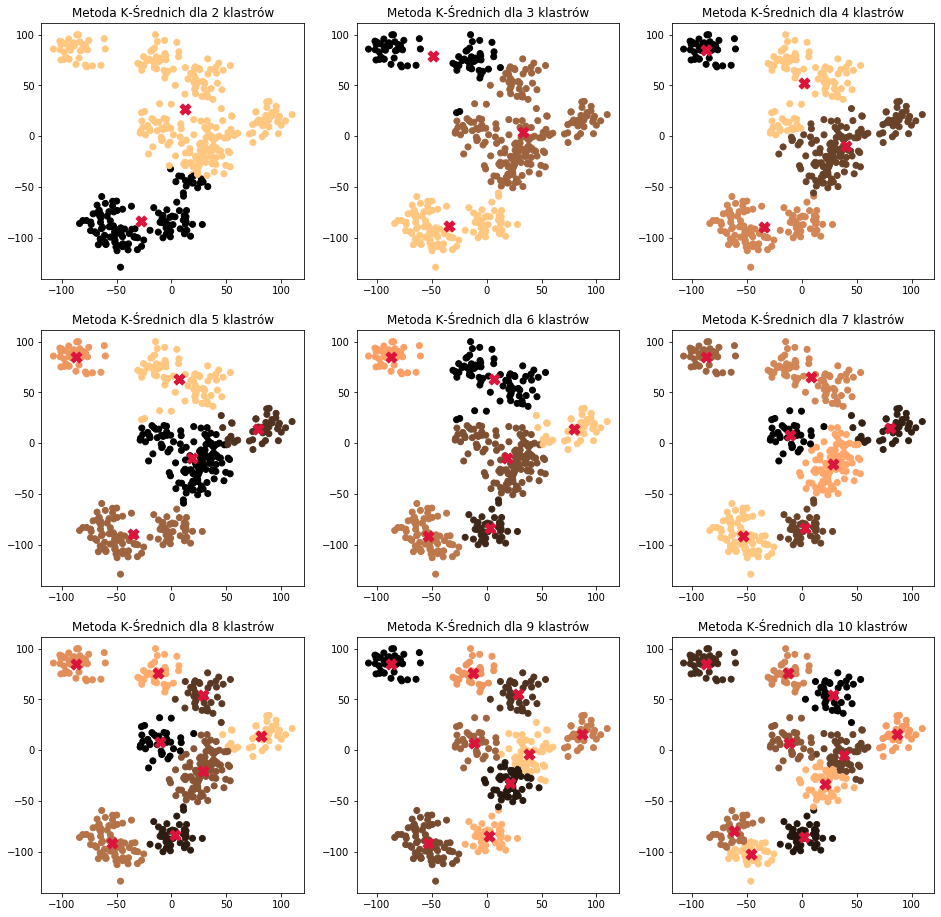

In [6]:
f = plt.figure(figsize=(16,16))
for i in range(2,11):
    f.add_subplot(330+(i-1))
    kmeans_plot(data, i)

Jak widać powyżej, faktycznie 7, 8 i 9 wyglądają najlepiej. Najbardziej optymalną ilością jest 8 klastrów. 

## Klasteryzacja Aglomeracyjna

Tym razem sprawdzimy optymalną ilość klastrów za pomocą davies bouldin score.

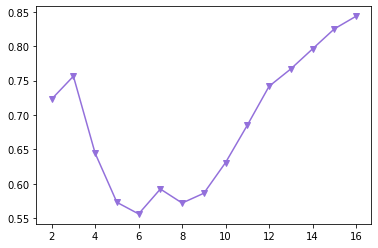

In [7]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering

n = []
score = []

for n_clusters in range(2,17):
    clusterer = AgglomerativeClustering(n_clusters, linkage="ward")
    preds = clusterer.fit_predict(data)
    n.append(n_clusters)
    score.append(davies_bouldin_score(data, preds))
    
plt.plot(n,score,'v-', color="mediumpurple")

Tutaj należy pamiętać że "im mniej tym lepiej". Najbardziej optymalne jest więc według tej miary 6 klastrów.  Blisko jest też jednak 5 i 8.

In [8]:
def agglo_plot(data, cluster_number):
    agglo = AgglomerativeClustering(cluster_number, linkage="ward")
    agglo.fit(data)
    agglo_y = agglo.fit_predict(data)
    plt.scatter(data['x'], data['y'], c=agglo_y, cmap='tab20')
    plt.title('Metoda Aglomeracyjna dla ' + str(cluster_number) + ' klastrów')

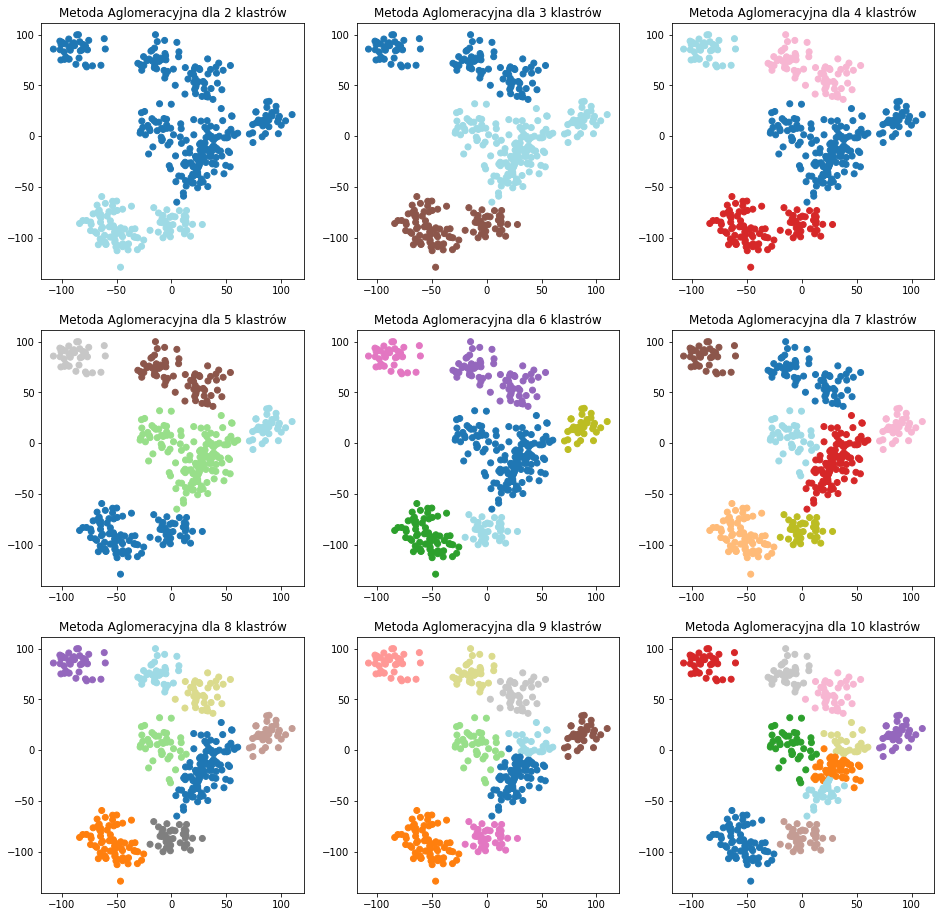

In [9]:
f = plt.figure(figsize=(16,16))
for i in range(2,11):
    f.add_subplot(330+(i-1))
    agglo_plot(data, i)

Powyżej widać czemu tutaj 5, 6 i 8 faktycznie są najbardziej optymalnymi ilościami klastrów. Faktycznie przy sześciu klastrach podział jest ładniejszy niż w metodzie k-średnich, i tutaj wygląda na jedno z najbardziej optymalnych rozdzieleń.